# Gender Recognition by Voice and Speech Analysis Using Artificial Neural Networks

`Disusun Oleh: Ghina Auliya (09011281722055)`

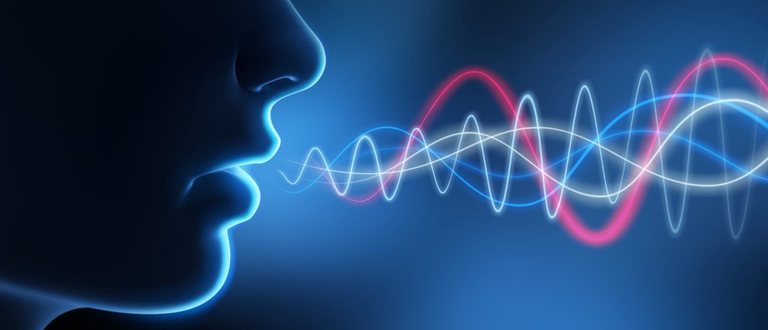

Pengenalan Suara Gender sebenarnya merupakan cabang penelitian yang sangat penting dalam bidang akustik dan pemrosesan suara. Suara manusia menunjukkan aspek yang sangat menarik yang telah dianalisis dan dibahas oleh banyak penelitian dan juga riset. Adapun penggunaan Artificial Neural Networks disini bertujuan untuk melakukan investigasi pada sinyal wicara guna menyusun klasifikasi gender. 

Klasifikasi gender berdasarkan analisis ucapan pada dasarnya bertujuan untuk memprediksi jenis kelamin pembicara dengan menganalisis berbagai parameter sampel suara. Dalam beberapa teknik, autokorelasi waktu dan fungsi perbedaan pada magnitudo rata-rata (AMDF) digunakan secara kolektif dengan menetapkan beberapa faktor bobot dan ambang batas yang ditetapkan berdasarkan fakta bahwa `laki-laki` memiliki `frekuensi dasar yang lebih rendah (hampir 120Hz)` dibandingkan dengan `perempuan` (hampir 200Hz). Hal ini merupakan analisis independen teks dan bahasa. 

`Laki-laki memiliki frekuensi lebih rendah daripada perempuan.` Tetapi, frekuensi formant adalah sesuatu yang berkaitan dengan vokal, maka dari itu klasifikasi gender dilakukan dengan menggunakan **pitch** (frekuensi dasar yang diekstraksi dari metode yang berbeda). 

**Pitch adalah** fitur yang sangat penting yang dapat diperoleh dari berbagai metode baik dalam domain waktu maupun domain frekuensi dan juga dengan kombinasi domain waktu dan frekuensi. 

Metode domain waktu mencakup semua metode yang bisa kita lakukan, sebagai contoh yaitu pada sampel pidato. Bentuk gelombang bicara dianalisis secara langsung dengan metode-metode seperti autokorelasi waktu, autokorelasi hasil modifikasi melalui teknik kliping, fungsi korelasi silang yang dinormalisasi, fungsi perbedaan magnitudo rata-rata, fungsi perbedaan kuadrat, dan lain sebagainya. 

Demikian pula, dalam metode domain frekuensi, konten frekuensi sinyal awalnya dihitung dan informasi diekstraksi dari spektrum. Metode-metode ini meliputi analisis spektrum harmonik, rasio Harmonic ke sub harmonik, dan lain-lain. Ada juga beberapa metode yang tidak termasuk dalam domain waktu atau domain frekuensi seperti wavelet, analisis LPC, dan lain sebagainya.

## 1. Import Library

ada beberapa library yang digunakan untuk mendukung penerapan machine learning sebagai klasifikasi gender berdasarkan suara berikut ini.

### Library keras

    a. Sequential models 
        - merupakan tumpukan lapisan linear
        
    b. Dense layers
        - Dense melaksanakan operasi: output = activation(dot(input, kernel) + bias) dimana aktivasi 
        adalah elemen fungsi wise-activation berakhir sebagai argumen aktivasi, kernel adalah matriks 
        bobot yang dibuat oleh layer, dan bias adalah vektor bias yang dibuat oleh layer (hanya 
        berlaku jika use_bias adalah True).
        
    c. to_Categorical utils
        - Mengonversi vektor kelas (bilangan bulat) ke matriks kelas biner.
        
### Scikit-learn

    a. Confusion_matrix
        - adalah pengukuran kinerja untuk masalah klasifikasi machine learning dimana kelas output bisa dua atau lebih. Ini adalah tabel dengan 4 kombinasi nilai prediksi dan aktual yang berbeda.
        
    b. MinMaxScaler preprocessing 
        - Mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.
    
    c. Train test split
        - Memisahkan array atau matriks kedalam susunan acak untuk dilatih dan subjek dari percobaan.
        
### Library numpy

    NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. Ini berisi antara lain:

    - Objek array N-dimensi yang kuat
    - Fungsi canggih (penyiaran)
    - Alat untuk mengintegrasikan kode C / C ++ dan Fortran
    - Aljabar linier yang berguna, transformasi Fourier, dan kemampuan angka acak
    
### matplotlib.pyplot

    Menyediakan kerangka plotting MATLAB.

    pylab menggabungkan pyplot dengan numpy ke dalam satu namespace. Ini nyaman untuk kerja interaktif, tetapi untuk 
    pemrograman, disarankan agar namespace disimpan terpisah.

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data Preparation 

In [2]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

## 2. Import Dataset 

`Source:` https://www.kaggle.com/primaryobjects/voicegender

Gender Recognition by Voice and Speech Analysis

Basis data ini dibuat untuk mengidentifikasi suara pria atau wanita, berdasarkan pada sifat akustik suara dan juga ucapan. Dataset ini terdiri dari 3.168 sampel suara yang direkam, kemudian dikumpulkan dari pembicara pria dan wanita. Sampel suara pra-diproses oleh analisis akustik dalam R menggunakan paket seewave dan tuneR, dengan rentang frekuensi yang dianalisis dari 0 hz-280 hz (rentang vokal manusia).

**Attributes Information:**

Properti akustik berikut dari setiap suara yang sudah diukur dan dimasukkan dalam CSV:

`Feature:`

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

`Label:`

- label: male(1) or female(0)

In [3]:
dataset = pd.read_csv('voice.csv', encoding='ISO-8859-1')
dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## Encoding Label

Label Encoding mengacu pada pengubahan label menjadi bentuk angka sehingga dapat mengubahnya menjadi bentuk yang dapat dibaca mesin.

In [4]:
enc = LabelEncoder()
data = dataset.apply(enc.fit_transform)
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,3,2243,6,35,3,1305,3063,3059,1379,2151,...,3,66,44,117,0,1,0,0,0,1
1,5,2392,9,45,4,1292,3090,3100,1347,2272,...,5,485,52,95,5,1,3,7,63,1
2,8,2964,8,24,11,2616,3155,3155,516,2072,...,8,267,41,113,2,1,1,1,36,1
3,464,2580,562,485,736,2165,258,288,3018,2990,...,464,95,166,95,281,1,67,79,2481,1
4,248,2826,214,329,647,2714,139,327,3136,3135,...,248,447,119,109,1369,1,624,665,2280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,206,2990,520,184,468,2891,965,1104,3004,3092,...,206,2796,866,105,1612,1,485,522,1864,0
3164,102,3093,41,148,609,2941,13,5,2971,2938,...,102,2925,535,117,1760,11,398,432,2618,0
3165,338,3146,1301,100,1478,3052,1128,1093,2783,2794,...,338,3139,579,117,890,1,301,322,2183,0
3166,355,3109,1353,156,1267,3020,697,701,2839,2860,...,355,2486,536,95,1520,1,386,425,2735,0


In [5]:
data.shape

(3168, 21)

In [6]:
data.info

<bound method DataFrame.info of       meanfreq    sd  median  Q25   Q75   IQR  skew  kurt  sp.ent   sfm  ...  \
0            3  2243       6   35     3  1305  3063  3059    1379  2151  ...   
1            5  2392       9   45     4  1292  3090  3100    1347  2272  ...   
2            8  2964       8   24    11  2616  3155  3155     516  2072  ...   
3          464  2580     562  485   736  2165   258   288    3018  2990  ...   
4          248  2826     214  329   647  2714   139   327    3136  3135  ...   
...        ...   ...     ...  ...   ...   ...   ...   ...     ...   ...  ...   
3163       206  2990     520  184   468  2891   965  1104    3004  3092  ...   
3164       102  3093      41  148   609  2941    13     5    2971  2938  ...   
3165       338  3146    1301  100  1478  3052  1128  1093    2783  2794  ...   
3166       355  3109    1353  156  1267  3020   697   701    2839  2860  ...   
3167       848  3132    1268  291  2613  3036   881   831    2621  2639  ...   

      c

In [7]:
data["label"].value_counts()

1    1584
0    1584
Name: label, dtype: int64

## Label Plot

Text(0, 0.5, 'Frequency')

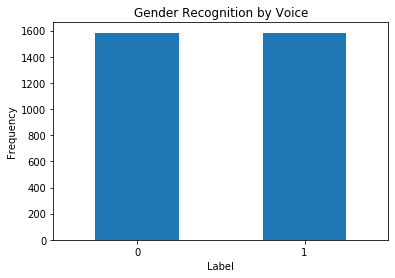

In [8]:
label = ['0','1']
classes = pd.value_counts(data['label'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Gender Recognition by Voice")
plt.xticks(range(2), label)
plt.xlabel("Label")
plt.ylabel("Frequency")

### Pengelompokan Fitur dan Label

In [10]:
feature = data.ix[:,0:19]
label = data.ix[:,20]

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexe

# 3. Pre-Processing

Pre-processing dengan metode MinMaxScaler dipilih karena dapat mengubah fitur dengan skala sesuai rentang yang diberikan. Hal ini dikarenakan rentang yang ada dari dataset merupakan 0 - 1 atau dapat dikatakan menggunakan klasifikasi biner.

In [11]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(feature)

In [12]:
feature_scaled.shape

(3168, 19)

## 4. Categorical

Dalam pengelompokan data yang dgunakan untuk training dan testing, label yang digunakan dapat dikategorikan menggunakan to_categorical sehingga program dapat membaca tujuan dari program yang ada.

In [13]:
label_categorical=to_categorical(label)
label_categorical.shape

(3168, 2)

## 5. Definisi Model

Dalam kasus ini, dilakukan pengetesan dengan model Sequential, terdapat 3 hidden layer pada kasus ini yang terbagi menjadi input layer dan output layer :

- 1 input layer
- 1 hidden layer
- 1 output layer

Penentuan jumlah layer ini berdasarkan percobaan `model compile` guna mencapai best model.

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 6. Model Compile 

Untuk memulai perhitungan dari layer-layer yang telah dihubungkan. 
Pada kasus ini dilakukan pembagian dataset menjadi 2 tipe, yaitu : **Train Data dan Test Data**. 

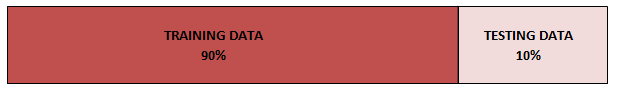

Test data yang dilakukan adalah sebesar 10% dan sisanya digunakan untuk Train data.

In [15]:
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.1)

Compiling model pada kasus ini menggunakan Optimization score function : "Adam", Loss Function : "binary_crossentropy" dan Objective Function berupa akurasi yang akan dicapai.

Data yang kita miliki mempunyai rentang dari 0 sampai 1, activation function pada output layer juga sigmoid yang mempunyai rentang dari 0 sampai 1. Itu semua identik dengan probability distribution, sehingga kita bisa anggap ini adalah permasalahan klasifikasi dan kita bisa gunakan binary crossentropy. 

Epoch yang dijalankan pada kasus ini sebanyak 200 dan batch size sebesar 100.

Untuk validation data, menggunakan feature_test dan label_test. Hal ini dipilih karena data test sudah dilakukan pemisahan sehingga dapat dilakukan test secara benar.

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
proses=model.fit(feature_train,label_train, epochs=200, batch_size=100,validation_data=(feature_test, label_test))

Train on 2851 samples, validate on 317 samples
Epoch 1/200
2851/2851 [==============================] - 1s 302us/step - loss: 0.6567 - accuracy: 0.5033 - val_loss: 0.6378 - val_accuracy: 0.4890
Epoch 2/200
2851/2851 [==============================] - 0s 44us/step - loss: 0.6053 - accuracy: 0.5240 - val_loss: 0.5852 - val_accuracy: 0.5773
Epoch 3/200
2851/2851 [==============================] - 0s 35us/step - loss: 0.5579 - accuracy: 0.6594 - val_loss: 0.5432 - val_accuracy: 0.7603
Epoch 4/200
2851/2851 [==============================] - 0s 34us/step - loss: 0.5226 - accuracy: 0.7531 - val_loss: 0.5159 - val_accuracy: 0.8170
Epoch 5/200
2851/2851 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.82 - 0s 43us/step - loss: 0.4958 - accuracy: 0.8281 - val_loss: 0.4943 - val_accuracy: 0.8517
Epoch 6/200
2851/2851 [==============================] - 0s 45us/step - loss: 0.4735 - accuracy: 0.8604 - val_loss: 0.4753 - val_accuracy: 0.9117
Epoch 7/200
2851/2851 [===========

2851/2851 [==============================] - 0s 51us/step - loss: 0.1589 - accuracy: 0.9797 - val_loss: 0.1459 - val_accuracy: 0.9811
Epoch 57/200
2851/2851 [==============================] - 0s 51us/step - loss: 0.1568 - accuracy: 0.9793 - val_loss: 0.1446 - val_accuracy: 0.9811
Epoch 58/200
2851/2851 [==============================] - 0s 51us/step - loss: 0.1551 - accuracy: 0.9800 - val_loss: 0.1414 - val_accuracy: 0.9811
Epoch 59/200
2851/2851 [==============================] - 0s 51us/step - loss: 0.1538 - accuracy: 0.9807 - val_loss: 0.1430 - val_accuracy: 0.9842
Epoch 60/200
2851/2851 [==============================] - 0s 40us/step - loss: 0.1520 - accuracy: 0.9797 - val_loss: 0.1379 - val_accuracy: 0.9811
Epoch 61/200
2851/2851 [==============================] - 0s 39us/step - loss: 0.1503 - accuracy: 0.9786 - val_loss: 0.1358 - val_accuracy: 0.9842
Epoch 62/200
2851/2851 [==============================] - 0s 33us/step - loss: 0.1484 - accuracy: 0.9797 - val_loss: 0.1349 - val_a

2851/2851 [==============================] - 0s 51us/step - loss: 0.1009 - accuracy: 0.9793 - val_loss: 0.0868 - val_accuracy: 0.9842
Epoch 112/200
2851/2851 [==============================] - 0s 95us/step - loss: 0.0989 - accuracy: 0.9807 - val_loss: 0.0826 - val_accuracy: 0.9779
Epoch 113/200
2851/2851 [==============================] - 0s 112us/step - loss: 0.0980 - accuracy: 0.9804 - val_loss: 0.0831 - val_accuracy: 0.9779
Epoch 114/200
2851/2851 [==============================] - 0s 67us/step - loss: 0.0974 - accuracy: 0.9811 - val_loss: 0.0808 - val_accuracy: 0.9811
Epoch 115/200
2851/2851 [==============================] - 0s 46us/step - loss: 0.0976 - accuracy: 0.9804 - val_loss: 0.0808 - val_accuracy: 0.9779
Epoch 116/200
2851/2851 [==============================] - 0s 40us/step - loss: 0.0963 - accuracy: 0.9797 - val_loss: 0.0801 - val_accuracy: 0.9779
Epoch 117/200
2851/2851 [==============================] - 0s 49us/step - loss: 0.0957 - accuracy: 0.9793 - val_loss: 0.0822 

2851/2851 [==============================] - 0s 116us/step - loss: 0.0761 - accuracy: 0.9818 - val_loss: 0.0606 - val_accuracy: 0.9811
Epoch 167/200
2851/2851 [==============================] - 0s 51us/step - loss: 0.0753 - accuracy: 0.9786 - val_loss: 0.0611 - val_accuracy: 0.9779
Epoch 168/200
2851/2851 [==============================] - 0s 39us/step - loss: 0.0759 - accuracy: 0.9804 - val_loss: 0.0599 - val_accuracy: 0.9779
Epoch 169/200
2851/2851 [==============================] - 0s 38us/step - loss: 0.0758 - accuracy: 0.9804 - val_loss: 0.0593 - val_accuracy: 0.9779
Epoch 170/200
2851/2851 [==============================] - 0s 41us/step - loss: 0.0749 - accuracy: 0.9807 - val_loss: 0.0648 - val_accuracy: 0.9811
Epoch 171/200
2851/2851 [==============================] - 0s 37us/step - loss: 0.0748 - accuracy: 0.9811 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 172/200
2851/2851 [==============================] - 0s 55us/step - loss: 0.0742 - accuracy: 0.9804 - val_loss: 0.0588 

## 7. Model Predict

Prediksi model ini diambil dari nilai data test feature, karena data ini telah di pre-processing dimana nantinya nilai prediksi ini dapat digunakan sebagai parameter Confusion Matrix.

In [23]:
prediction = model.predict_classes(feature_test)

In [24]:
prediction

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## 8. Evaluasi Model

**Accuracy of Testing Data**

Performa dari dataset voice ini dapat ditunjukkan dari model evaluate dari data test fitur dan data test label.

Pada percobaan ini didapatkan akurasi sebesar `97.79%` dari data testing. 

In [21]:
#print the accuracy of testing data
acc = model.evaluate(feature_test,label_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], acc[1]*100))

317/317 [==============================] - 0s 101us/step

accuracy: 97.79%


**Accuracy of Training Data**

Performa dari dataset voice ini dapat ditunjukkan dari model evaluate dari data train fitur dan data train label.

Pada percobaan ini didapatkan akurasi sebesar `98.07%` dari data training. 

In [22]:
#print the accuracy of training data
acc = model.evaluate(feature_train,label_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], acc[1]*100))

2851/2851 [==============================] - 0s 84us/step

accuracy: 98.07%


## 9. Plotting Hasil Performa Data

Hasil performa yang didapat antara `Data Test dan Data Train` ditampilkan menjadi sebuah grafik untuk mengetahui baik-tidaknya perbedaan hasil percobaan performa.

In [17]:
loss = proses.history['loss']
acc = proses.history['accuracy']
val_loss = proses.history['val_loss']
val_acc = proses.history['val_accuracy']

### Accuracy Plot 

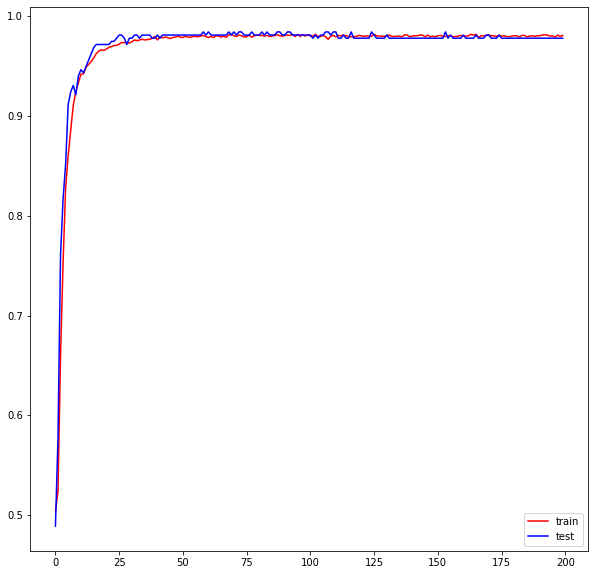

In [19]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(10,10))
ax0.plot(np.arange(200),acc,'r')
ax0.plot(np.arange(200),val_acc,'b')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model akurasi.png')

### Loss Plot 

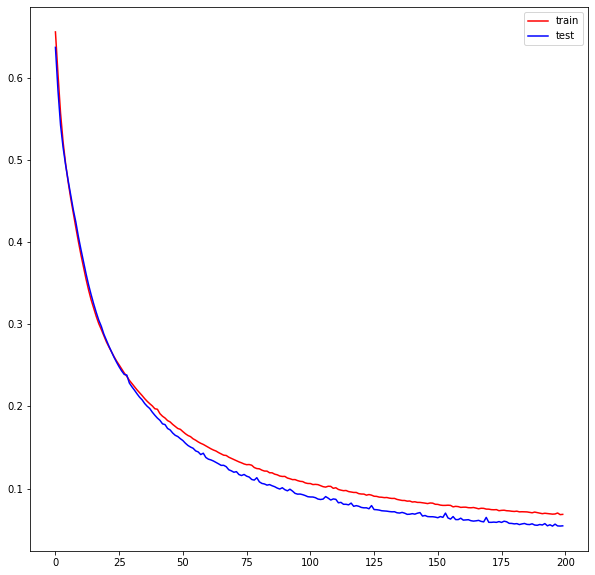

In [20]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(10,10))
ax0.plot(np.arange(200),loss,'r')
ax0.plot(np.arange(200),val_loss,'b')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model loss.png')

## 10. CONFUSION MATRIX

Setelah mendapatkan hasil dari proses training dan testing, maka dapat dilakukan pengetesan kembali tingkat akurasi data yang diolah dengan confusion matrix dari data yang telah di Pre-processing.

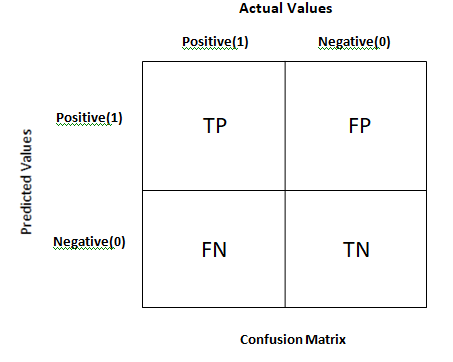

In [25]:
cm=confusion_matrix(label_test, prediction)

In [26]:
cm

array([[152,   3],
       [  4, 158]], dtype=int64)

In [27]:
TP = cm[[0],[0]]
FP = cm[[0],[1]]
FN = cm[[1],[0]]
TN = cm[[1],[1]]

### 1. Accuracy

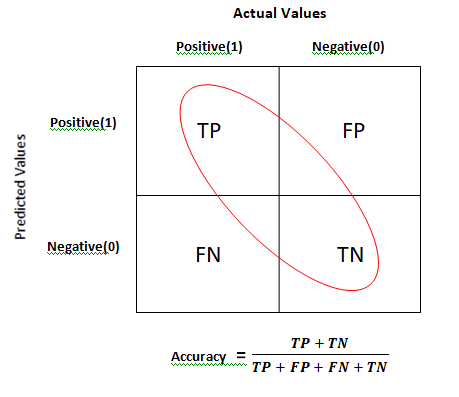

Akurasi dari klasifikasi ini adalah prediksi dari performa yang dibuat dari model yang telah ditentukan.

In [28]:
akurasi=((TP+TN)/(TP+TN+FP+FN))*100
akurasi

array([97.79179811])

### 2. Precision

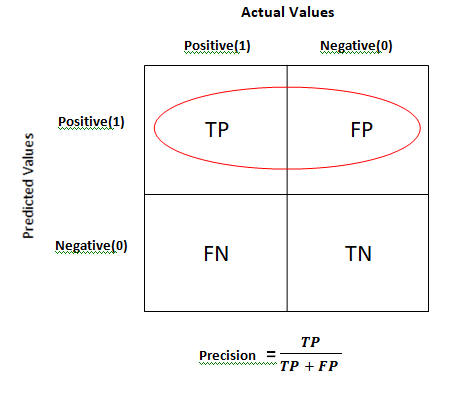

Presisi dari pengukuran ini menunjukkan apakah suara tersebut suara wanita atau pria.

In [29]:
Precision = (TP/(TP+FP)) * 100
Precision

array([98.06451613])

### 3. Sensitivity

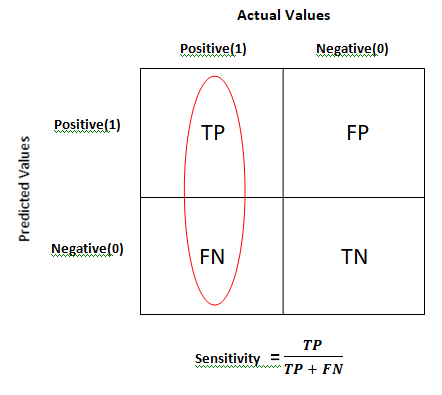

Sensitifitas menunjukkan proporsi suara dari suara yang benar-benar pria atau benar-benar wanita.

In [30]:
Sensitivity = (TP/(TP+FN)) * 100
Sensitivity

array([97.43589744])

### 4. Specivicity

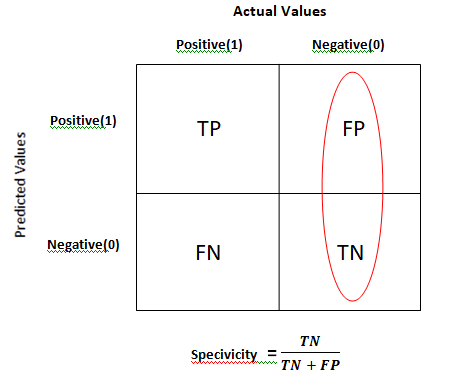

Spesifisitas merupakan proporsi suara yang merupakan bukan pria dan atau bukan wanita.

In [31]:
Specivicity = (TN/(TN+FP) * 100)
Specivicity

array([98.13664596])

# 11. Conclusion 

**Berdasarkan hasil akurasi percobaan "Gender Recognition by Voice and Speech Analysis Using Artificial Neural Networks"**

- Testing akurasi dari paper : 99%
- Testing akurasi percobaan : 97,79%

Berdasarkan hasil yang diperoleh dari pecobaan ini dapat dilihat data akurasi dan loss yang terjadi antara data training dan data testing yang balance, hal ini disebabkan penggunaan jumlah hidden layer dan juga banyak epoch yang dapat mempengaruhi hasil ini. Selain itu, loss data training lebih besar dibandingkan loss data testing. Sehingga, hal ini menunjukkan hasil yang baik.

Selain itu perbandingan akurasi antara data testing dan data training memiliki hasil yang tidak jauh berbeda, dimana data training mnunjukkan hasil akurasi yang baik dibandingkan data testing.